Current weights:
[0.69870701 0.66228872]
Final error rate:
0.001


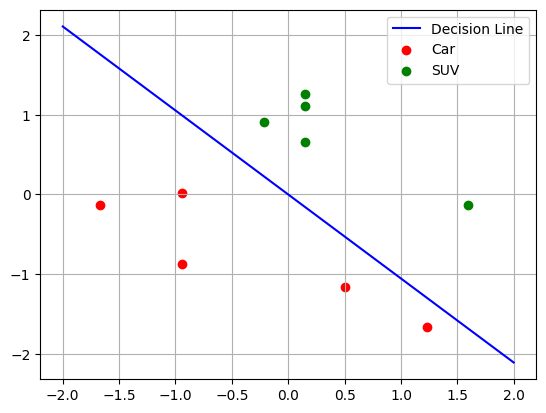

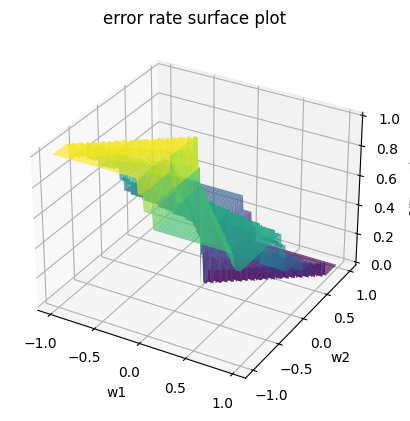

In [63]:
#Name: Tyler Gauldin
#Class: CMSC 491
#Due Date: 9/12/2023

#Goal: Implement a 2-feature based perceptron algorithm and correctly predict
#whether the vehicle is a car or suv based off the two given features


import pandas as pd;
import numpy as np;
import random
import matplotlib.pyplot as plt


class Perceptron:
  def __init__(self, learnrate=0.1, n=100):
    self.learnrate = learnrate
    self.n = n
    self.w = np.zeros(2)
    self.total = 0
    self.error = 0

  #predicts whether vehicle is a car or a suv
  def predict(self, x):
    wT = np.transpose(self.w)
    prediction = np.dot(wT, x)
    #print(prediction)

    if prediction >= 0:
      return 1
    else:
      return -1

  #trains the pereception with the given features (X) and their values (Y)
  def train(self, X, Y):
    rand1 = random.random()
    rand2 = random.random()
    self.w = np.array([rand1, rand2])

    for _ in range(self.n):
      for i in range(X.shape[0]):
        prediction = self.predict(X[i])
        actual = Y[i]
        #print("actual: " + str(actual) + " predicted :" + str(prediction))
        if(prediction != actual):
          adjustment = self.learnrate*(Y[i] - prediction)*X[i]
          self.w += adjustment
          self.error += 1
        self.total += 1



#reads the csv
df=pd.read_csv('carSUV_normalized.csv', index_col='SampleName')


#combines the featurs into one datafram
combined_df = pd.DataFrame({'Combined': df['ZeroToSixty'].values, 'AnotherCombined': df['PowerHP'].values})


#converts the df into arrays
X = np.array(combined_df)
Y = (np.array(df['IsCar']) - np.array(df['IsSUV']))
Y = (np.array(df['IsSUV']) - np.array(df['IsCar']))


#creates pereceptron with given learnrate and number of epochs to go through
perceptron = Perceptron(learnrate=0.1, n=100)
perceptron.train(X, Y)
print("Current weights:")
print(perceptron.w)

print("Final error rate:")
print(perceptron.error/perceptron.total)

#calculates the functions rate
function_rate = (perceptron.w[0]/perceptron.w[1])*-1


#seperates the two features into their own array
x = X[:, 0]
y = X[:, 1]


#seperates the x-cords for cars ands suvs and y-cords for suvs and cars
xCar = x[:len(x)//2]
xSUV = x[len(x)//2:]
yCar = y[:len(y)//2]
ySUV = y[len(y)//2:]

#creates the fucnctiona and width of the plot
newX = np.linspace(-2, 2)
newY = newX*function_rate;

#creats the plot and puts the points on the graph
plt.plot(newX, newY, label='Decision Line', color='blue')
plt.scatter(xCar, yCar, color='red', label='Car')
plt.scatter(xSUV, ySUV, color='green', label='SUV')
plt.grid()
plt.legend()
plt.show()


#gets the error rates for all possible weights from -1.0 to 1.0 (w/ a step of 0.01)
def function_error_rate(W1, W2, datasetX, datasetY):
  error_rates = np.empty_like(W1)

  #goes through all possible weight values
  for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
      #sets the weights
      w1 = W1[i, j]
      w2 = W2[i, j]

      #gets all prediction of the weights
      prediction = datasetX[:, 0] * w1 + datasetX[:, 1]*w2
      #set the counts
      count = 0
      error = 0

      #goes through each prediction and sees if they're correct on incorrect
      for n in range(len(prediction)):
        if prediction[n] >= 0 and datasetY[n] == 1:
          count += 1
        elif prediction[n] >= 0 and datasetY[n] == -1:
          error += 1
          count += 1
        elif prediction[n] < 0 and datasetY[n] == -1:
          count += 1
        elif prediction[n] < 0 and datasetY[n] == 1:
          error += 1
          count += 1

        #calculate the error rate
        error_rate = error/count

      #sets the error rates of each individual weight
      error_rates[i, j] = error_rate
  #returns all the error rates
  return error_rates


#creats w1 and w2
w1 = np.arange(-1, 1, 0.01)
w2 = np.arange(-1, 1, 0.01)
W1, W2 = np.meshgrid(w1, w2)

#gets error rates
error_rates = function_error_rate(W1, W2, X, Y)


#plots the 3d surface error plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(W1, W2, error_rates, cmap='viridis', alpha=0.7)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error rate')
ax.set_title('error rate surface plot')
plt.show()
